In [2]:
import pandas as pd

Dataset_A = pd.read_excel("C:/Users/lenovo/Downloads/Newdataset.xlsx")
print(Dataset_A)

     instant     dteday  season  yr  mnth  hr  holiday  weekday  weathersit  \
0          1 2011-01-01       1   0     1   0    False        6           1   
1          2 2011-01-01       1   0     1   1    False        6           1   
2          3 2011-01-01       1   0     1   2    False        6           1   
3          4 2011-01-01       1   0     1   3    False        6           1   
4          5 2011-01-01       1   0     1   4    False        6           1   
..       ...        ...     ...  ..   ...  ..      ...      ...         ...   
605      606 2011-01-28       1   0     1  11    False        5           3   
606      607 2011-01-28       1   0     1  12    False        5           3   
607      608 2011-01-28       1   0     1  13    False        5           3   
608      609 2011-01-28       1   0     1  14    False        5           3   
609      610 2011-01-28       1   0     1  15    False        5           2   

     temp   atemp   hum  windspeed  casual  registe

In [3]:
Dataset3 = pd.read_excel("C:/Users/lenovo/Downloads/dataset_3.xlsx")
print(Dataset3)

     instant     dteday  season  yr  mnth  hr  holiday  weekday  weathersit  \
0        620 2011-01-29       1   0     1   1    False        6           1   
1        621 2011-01-29       1   0     1   2    False        6           1   
2        622 2011-01-29       1   0     1   3    False        6           1   
3        623 2011-01-29       1   0     1   4    False        6           1   
4        624 2011-01-29       1   0     1   6    False        6           1   
..       ...        ...     ...  ..   ...  ..      ...      ...         ...   
385      615 2011-01-28       1   0     1  20    False        5           2   
386      616 2011-01-28       1   0     1  21    False        5           2   
387      617 2011-01-28       1   0     1  22    False        5           1   
388      618 2011-01-28       1   0     1  23    False        5           1   
389      619 2011-01-29       1   0     1   0    False        6           1   

     temp   atemp   hum  windspeed  casual  registe

In [5]:
Dataset3.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
Dataset3.duplicated().sum()

0

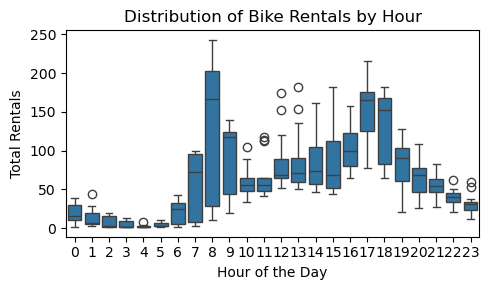

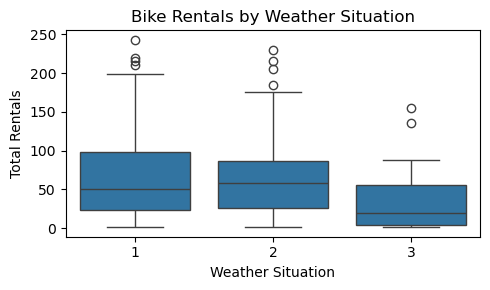

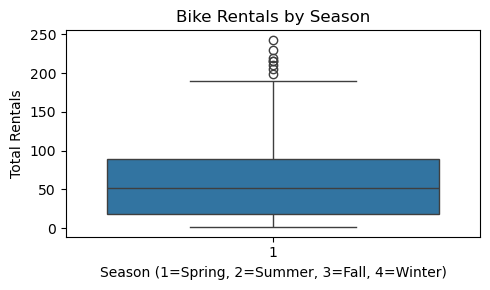

In [49]:
# Count of Rentals per Hour

plt.figure(figsize=(5, 3))
sns.boxplot(data=Dataset3, x='hr', y='cnt')
plt.title("Distribution of Bike Rentals by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Rentals")
plt.tight_layout()
plt.show()

# Rentals by Weather

plt.figure(figsize=(5, 3))
sns.boxplot(data=Dataset3, x='weathersit', y='cnt')
plt.title("Bike Rentals by Weather Situation")
plt.xlabel("Weather Situation")
plt.ylabel("Total Rentals")
plt.tight_layout()
plt.show()

# Effect of Season on Rentals

plt.figure(figsize=(5, 3))
sns.boxplot(data=Dataset3, x='season', y='cnt')
plt.title("Bike Rentals by Season")
plt.xlabel("Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)")
plt.ylabel("Total Rentals")
plt.tight_layout()
plt.show()



In [7]:
print("Dataset3 'dteday' dtype:", Dataset3['dteday'].dtype)
print("Dataset_A 'dteday' dtype:", Dataset_A['dteday'].dtype)

Dataset3 'dteday' dtype: datetime64[ns]
Dataset_A 'dteday' dtype: datetime64[ns]


In [8]:
FinalDataset = pd.merge(Dataset3, Dataset_A, on='dteday', how='inner')
print(FinalDataset)

     instant_x     dteday  season_x  yr_x  mnth_x  hr_x  holiday_x  weekday_x  \
0          611 2011-01-28         1     0       1    16      False          5   
1          611 2011-01-28         1     0       1    16      False          5   
2          611 2011-01-28         1     0       1    16      False          5   
3          611 2011-01-28         1     0       1    16      False          5   
4          611 2011-01-28         1     0       1    16      False          5   
..         ...        ...       ...   ...     ...   ...        ...        ...   
115        618 2011-01-28         1     0       1    23      False          5   
116        618 2011-01-28         1     0       1    23      False          5   
117        618 2011-01-28         1     0       1    23      False          5   
118        618 2011-01-28         1     0       1    23      False          5   
119        618 2011-01-28         1     0       1    23      False          5   

     weathersit_x  temp_x  

In [12]:
FinalDataset.to_excel("finaldata.xlsx", index=False)

In [25]:
FinalDataset.isnull().sum()

instant_x       0
dteday          0
season_x        0
yr_x            0
mnth_x          0
hr_x            0
holiday_x       0
weekday_x       0
weathersit_x    0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
cnt_x           0
instant_y       0
season_y        0
yr_y            0
mnth_y          0
hr_y            0
holiday_y       0
weekday_y       0
weathersit_y    0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
cnt_y           0
dtype: int64

In [14]:
numeric_cols = FinalDataset.select_dtypes(include='number').columns
for col in numeric_cols:
    Q1 = FinalDataset[col].quantile(0.25)
    Q3 = FinalDataset[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = FinalDataset[(FinalDataset[col] < Q1 - 1.5 * IQR) | (FinalDataset[col] > Q3 + 1.5 * IQR)]
    print(f"{col} - Outliers: {len(outliers)}")
    

instant_x - Outliers: 0
season_x - Outliers: 0
yr_x - Outliers: 0
mnth_x - Outliers: 0
hr_x - Outliers: 0
weekday_x - Outliers: 0
weathersit_x - Outliers: 0
temp_x - Outliers: 30
atemp_x - Outliers: 15
hum_x - Outliers: 0
windspeed_x - Outliers: 30
casual_x - Outliers: 15
registered_x - Outliers: 0
cnt_x - Outliers: 0
instant_y - Outliers: 0
season_y - Outliers: 0
yr_y - Outliers: 0
mnth_y - Outliers: 0
hr_y - Outliers: 0
weekday_y - Outliers: 0
weathersit_y - Outliers: 0
temp_y - Outliers: 0
atemp_y - Outliers: 48
hum_y - Outliers: 0
windspeed_y - Outliers: 16
casual_y - Outliers: 8
registered_y - Outliers: 8
cnt_y - Outliers: 8


In [ ]:
import pandas as pd

def replace_outliers_with_median(FinalDataset, column):
    Q1 = FinalDataset[column].quantile(0.25)
    Q3 = FinalDataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = FinalDataset[column].median()
    FinalDataset[column] = FinalDataset[column].apply(lambda x: median if x < lower or x > upper else x)
    return FinalDataset

columns_with_outliers = ['temp_x', 'atemp_x', 'windspeed_x', 'casual_x',
                         'atemp_y', 'windspeed_y', 'casual_y', 'registered_y', 'cnt_y']

for col in columns_with_outliers:
    FinalDataset = replace_outliers_with_median(FinalDataset, col)

print(FinalDataset[columns_with_outliers].describe())

             temp_x       atemp_x  windspeed_x    casual_x       atemp_y  \
count  1.200000e+02  1.200000e+02   120.000000  120.000000  1.200000e+02   
mean   2.400000e-01  2.273000e-01     0.167888    1.359375  2.121000e-01   
std    5.853110e-16  3.344634e-16     0.031583    0.404012  3.065915e-16   
min    2.400000e-01  2.273000e-01     0.134300    1.000000  2.121000e-01   
25%    2.400000e-01  2.273000e-01     0.134300    1.000000  2.121000e-01   
50%    2.400000e-01  2.273000e-01     0.164150    1.187500  2.121000e-01   
75%    2.400000e-01  2.273000e-01     0.194000    1.625000  2.121000e-01   
max    2.400000e-01  2.273000e-01     0.223900    2.000000  2.121000e-01   

       windspeed_y    casual_y  registered_y       cnt_y  
count   120.000000  120.000000    120.000000  120.000000  
mean      0.111460    0.733333     24.333333   24.866667  
std       0.020362    0.774958     17.557269   17.812720  
min       0.089600    0.000000      0.000000    1.000000  
25%       0.104500  

In [ ]:
import matplotlib.pyplot as plt
correlation_matrix = FinalDataset.corr()
print(correlation_matrix)

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

                 instant_x  dteday  season_x  yr_x  mnth_x          hr_x  \
instant_x     1.000000e+00     NaN       NaN   NaN     NaN  1.000000e+00   
dteday                 NaN     NaN       NaN   NaN     NaN           NaN   
season_x               NaN     NaN       NaN   NaN     NaN           NaN   
yr_x                   NaN     NaN       NaN   NaN     NaN           NaN   
mnth_x                 NaN     NaN       NaN   NaN     NaN           NaN   
hr_x          1.000000e+00     NaN       NaN   NaN     NaN  1.000000e+00   
holiday_x              NaN     NaN       NaN   NaN     NaN           NaN   
weekday_x              NaN     NaN       NaN   NaN     NaN           NaN   
weathersit_x  1.690309e-01     NaN       NaN   NaN     NaN  1.690309e-01   
temp_x                 NaN     NaN       NaN   NaN     NaN           NaN   
atemp_x                NaN     NaN       NaN   NaN     NaN           NaN   
hum_x        -8.731586e-01     NaN       NaN   NaN     NaN -8.731586e-01   
windspeed_x 

NameError: name 'plt' is not defined

In [27]:
Final_Data = pd.read_excel("C:/Users/lenovo/Downloads/finaldata.xlsx")
print(Final_Data)

     instant_x     dteday  season_x  yr_x  mnth_x  hr_x  holiday_x  weekday_x  \
0          611 2011-01-28         1     0       1    16      False          5   
1          611 2011-01-28         1     0       1    16      False          5   
2          611 2011-01-28         1     0       1    16      False          5   
3          611 2011-01-28         1     0       1    16      False          5   
4          611 2011-01-28         1     0       1    16      False          5   
..         ...        ...       ...   ...     ...   ...        ...        ...   
115        618 2011-01-28         1     0       1    23      False          5   
116        618 2011-01-28         1     0       1    23      False          5   
117        618 2011-01-28         1     0       1    23      False          5   
118        618 2011-01-28         1     0       1    23      False          5   
119        618 2011-01-28         1     0       1    23      False          5   

     weathersit_x  temp_x  

In [29]:
numeric_df = Final_Data.select_dtypes(include=['float64', 'int64'])
print(numeric_df)

     instant_x  season_x  yr_x  mnth_x  hr_x  weekday_x  weathersit_x  temp_x  \
0          611         1     0       1    16          5             1    0.22   
1          611         1     0       1    16          5             1    0.22   
2          611         1     0       1    16          5             1    0.22   
3          611         1     0       1    16          5             1    0.22   
4          611         1     0       1    16          5             1    0.22   
..         ...       ...   ...     ...   ...        ...           ...     ...   
115        618         1     0       1    23          5             1    0.24   
116        618         1     0       1    23          5             1    0.24   
117        618         1     0       1    23          5             1    0.24   
118        618         1     0       1    23          5             1    0.24   
119        618         1     0       1    23          5             1    0.24   

     atemp_x  hum_x  ...  h

In [30]:
numeric_df.isnull().sum()

instant_x       0
season_x        0
yr_x            0
mnth_x          0
hr_x            0
weekday_x       0
weathersit_x    0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
cnt_x           0
instant_y       0
season_y        0
yr_y            0
mnth_y          0
hr_y            0
weekday_y       0
weathersit_y    0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
cnt_y           0
dtype: int64

In [31]:
numeric_df = numeric_df.fillna(numeric_df.median())
print(numeric_df)

     instant_x  season_x  yr_x  mnth_x  hr_x  weekday_x  weathersit_x  temp_x  \
0          611         1     0       1    16          5             1    0.22   
1          611         1     0       1    16          5             1    0.22   
2          611         1     0       1    16          5             1    0.22   
3          611         1     0       1    16          5             1    0.22   
4          611         1     0       1    16          5             1    0.22   
..         ...       ...   ...     ...   ...        ...           ...     ...   
115        618         1     0       1    23          5             1    0.24   
116        618         1     0       1    23          5             1    0.24   
117        618         1     0       1    23          5             1    0.24   
118        618         1     0       1    23          5             1    0.24   
119        618         1     0       1    23          5             1    0.24   

     atemp_x  hum_x  ...  h

In [32]:
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                 instant_x  season_x  yr_x  mnth_x          hr_x  weekday_x  \
instant_x     1.000000e+00       NaN   NaN     NaN  1.000000e+00        NaN   
season_x               NaN       NaN   NaN     NaN           NaN        NaN   
yr_x                   NaN       NaN   NaN     NaN           NaN        NaN   
mnth_x                 NaN       NaN   NaN     NaN           NaN        NaN   
hr_x          1.000000e+00       NaN   NaN     NaN  1.000000e+00        NaN   
weekday_x              NaN       NaN   NaN     NaN           NaN        NaN   
weathersit_x  1.690309e-01       NaN   NaN     NaN  1.690309e-01        NaN   
temp_x        2.519763e-01       NaN   NaN     NaN  2.519763e-01        NaN   
atemp_x      -7.805905e-01       NaN   NaN     NaN -7.805905e-01        NaN   
hum_x        -8.731586e-01       NaN   NaN     NaN -8.731586e-01        NaN   
windspeed_x   7.372828e-01       NaN   NaN     NaN  7.372828e-01        NaN   
casual_x     -7.103328e-01       NaN   NaN     NaN -

In [34]:
numeric_df = Final_Data.select_dtypes(include=['int64', 'float64'])
print(numeric_df)

     instant_x  season_x  yr_x  mnth_x  hr_x  weekday_x  weathersit_x  temp_x  \
0          611         1     0       1    16          5             1    0.22   
1          611         1     0       1    16          5             1    0.22   
2          611         1     0       1    16          5             1    0.22   
3          611         1     0       1    16          5             1    0.22   
4          611         1     0       1    16          5             1    0.22   
..         ...       ...   ...     ...   ...        ...           ...     ...   
115        618         1     0       1    23          5             1    0.24   
116        618         1     0       1    23          5             1    0.24   
117        618         1     0       1    23          5             1    0.24   
118        618         1     0       1    23          5             1    0.24   
119        618         1     0       1    23          5             1    0.24   

     atemp_x  hum_x  ...  h

In [35]:
print("Skewness for each column:")
print(numeric_df.skew())

Skewness for each column:
instant_x       0.000000
season_x        0.000000
yr_x            0.000000
mnth_x          0.000000
hr_x            0.000000
weekday_x       0.000000
weathersit_x    0.522958
temp_x         -1.169369
atemp_x         1.085505
hum_x          -0.754650
windspeed_x     0.213994
casual_x        1.548920
registered_x    0.544008
cnt_x           0.415531
instant_y       0.000000
season_y        0.000000
yr_y            0.000000
mnth_y          0.000000
hr_y           -0.123522
weekday_y       0.000000
weathersit_y    0.413434
temp_y          0.152838
atemp_y         1.678722
hum_y           0.125971
windspeed_y    -1.179283
casual_y        2.165740
registered_y    1.715044
cnt_y           1.681389
dtype: float64


In [36]:
print("\nKurtosis for each column:")
print(numeric_df.kurtosis())


Kurtosis for each column:
instant_x      -1.239558
season_x        0.000000
yr_x            0.000000
mnth_x          0.000000
hr_x           -1.239558
weekday_x       0.000000
weathersit_x   -1.756067
temp_x         -0.643585
atemp_x         0.638411
hum_x          -0.533261
windspeed_x     0.275101
casual_x        1.130210
registered_x   -0.498818
cnt_x          -0.644389
instant_y      -1.211001
season_y        0.000000
yr_y            0.000000
mnth_y          0.000000
hr_y           -1.195786
weekday_y       0.000000
weathersit_y   -1.860363
temp_y         -0.363336
atemp_y         1.971004
hum_y          -1.237193
windspeed_y     1.036067
casual_y        4.661635
registered_y    2.602246
cnt_y           2.379566
dtype: float64


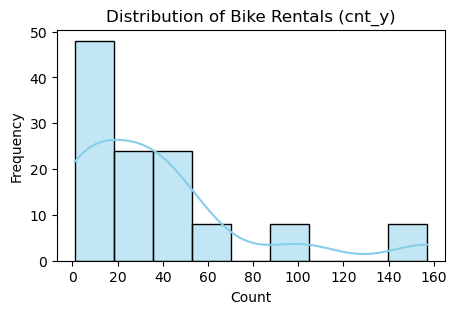

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.histplot(Final_Data['cnt_y'], kde=True, color='skyblue')
plt.title('Distribution of Bike Rentals (cnt_y)')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

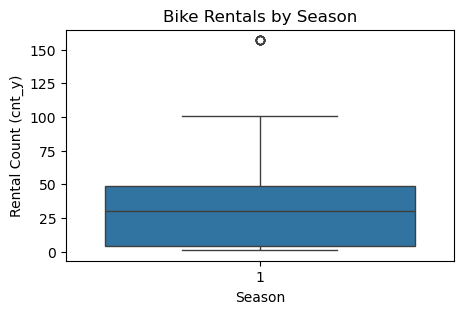

In [42]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='season_y', y='cnt_y', data=Final_Data)
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Rental Count (cnt_y)')
plt.show()

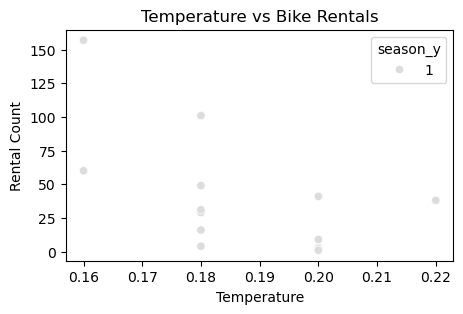

In [44]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='temp_y', y='cnt_y', data=Final_Data, hue='season_y', palette='coolwarm')
plt.title('Temperature vs Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Rental Count')
plt.show()

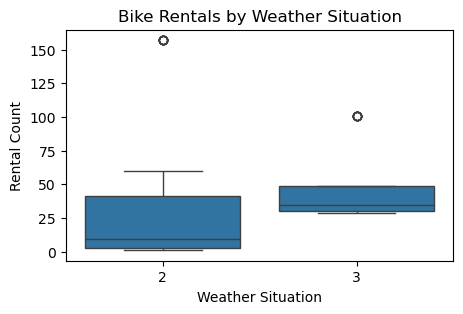

In [45]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='weathersit_y', y='cnt_y', data=Final_Data)
plt.title('Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Rental Count')
plt.show()

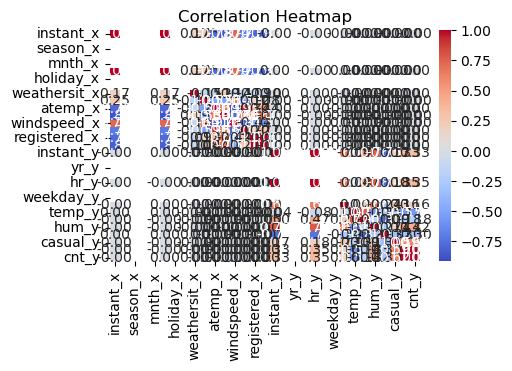

In [47]:
plt.figure(figsize=(5, 3))
corr = Final_Data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

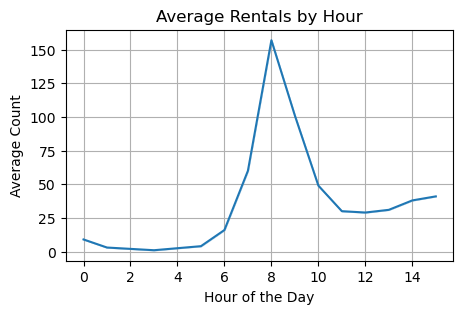

In [48]:
plt.figure(figsize=(5, 3))
sns.lineplot(data=Final_Data, x='hr_y', y='cnt_y', estimator='mean')
plt.title('Average Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.grid(True)
plt.show